

# Project: Investigate TMDb Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am useing TMDb dataset for this data anlysis project.
## Some questions which can be analyised from this datase
>  * How the amount of film production have changed over the years? 
>  * How Total profit have changed over the years?
>  * What properties are associated with movies that have the most popularity?
>  * What properties are associated with movies that have high profit?
>  * Which genres are more profitable?
>  * Who are the most frequent cast in highly profitable movies?
>  * Which genres are most popular?
>  * Who are the most frequent cast in the most popular movies?



In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset,i will keep the data that i need to answer the questions and i will delete the unused data from the dataset to keep dataset clean to analyse.

### General Properties

In [784]:
#loading the file and assign it to a variable df
df=pd.read_csv('tmdb-movies.csv')
#Having a look at the first 5 lines of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [785]:
#lets check the total columns and rows. 
print('This dataset has '+str(df.shape[0])+' columns and '+str(df.shape[1])+' rows.')

This dataset has 10866 columns and 21 rows.


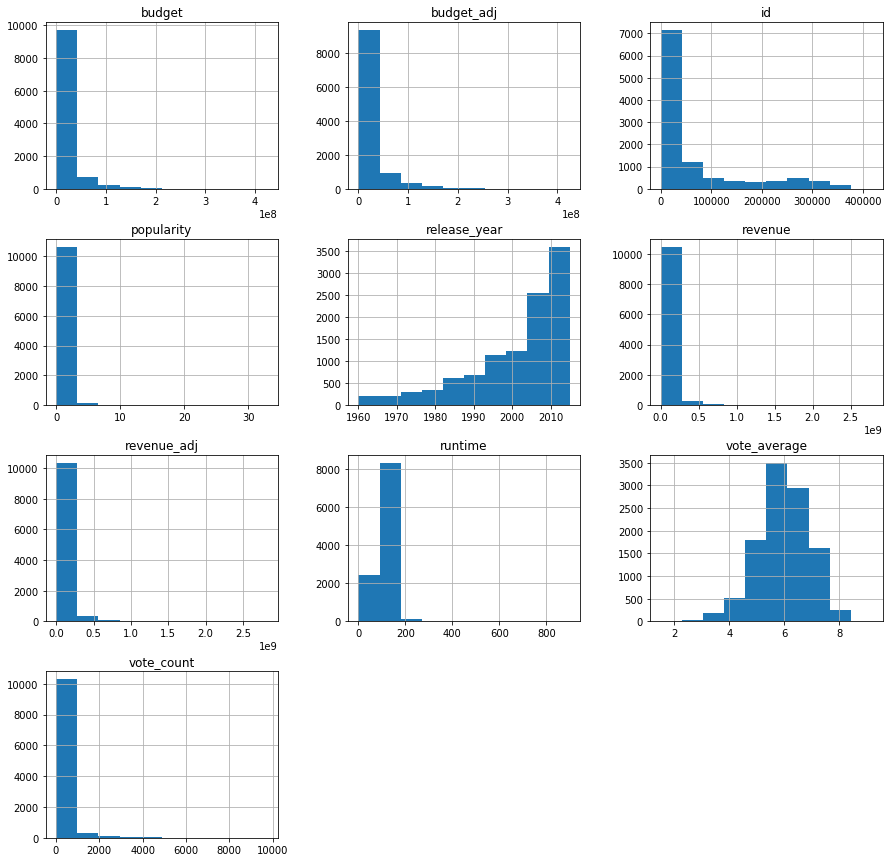

In [786]:
df.hist(figsize=(15,15));

In [787]:
#general properties
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [788]:
#general properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [789]:
#checking NaN values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [790]:
#checking duplicacy
df.duplicated().sum()

1

## Observation
> * Some values are seperated by '|'
> * Some rows have 0 value
> * Some numbers are in scientific form
> * There is duplicacy



## Data Cleaning 

> * Drop duplicates
> * Change scientific number
> * Drop unnecessary columns
> * Replace 0 wiith NAN then drop the null values

> ### Dropping Duplicates

In [791]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [792]:
#checking for duplicates
df.duplicated().sum()

0

> ### changing scientific form to numeric form

In [793]:
pd.options.display.float_format = '{:.2f}'.format

In [794]:
#checking the change
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00,10865.00
mean,66066.37,0.65,14624286.06,39826896.08,102.07,217.40,5.98,2001.32,17549894.04,51369001.76
std,92134.09,1.00,30914284.61,117008277.46,31.38,575.64,0.94,12.81,34307526.66,144638333.13
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.00,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20662.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75612.00,0.71,15000000.00,24000000.00,111.00,146.00,6.60,2011.00,20853251.08,33701729.01
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


> ### Drop unnecessary columns

In [795]:
#Dropping columns
df.drop(['budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview','release_date'],axis=1,inplace=True)

In [796]:
#Checking for dropping columns
df.shape

(10865, 15)

> ## Replace 0 with NaN,then drop null values

In [797]:
#Columns need to be changed
drop_null=['revenue','budget','runtime']

In [798]:
#Replace 0 with NAN
df[drop_null]=df[drop_null].replace(0, np.NAN)
#drop NAN values
df.dropna(axis=0, inplace=True)

In [799]:
#for checking null values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



> ### Research Question 1 : How the amount of film production have changed over the years?

In [800]:
#for the range of xsticks,ysticks
df.groupby('release_year')['id'].count().describe()

count    56.00
mean     63.29
std      56.96
min       4.00
25%      11.75
50%      45.00
75%     111.00
max     180.00
Name: id, dtype: float64

([<matplotlib.axis.XTick at 0xa3e6ea2288>,
 <a list of 12 Text xticklabel objects>)

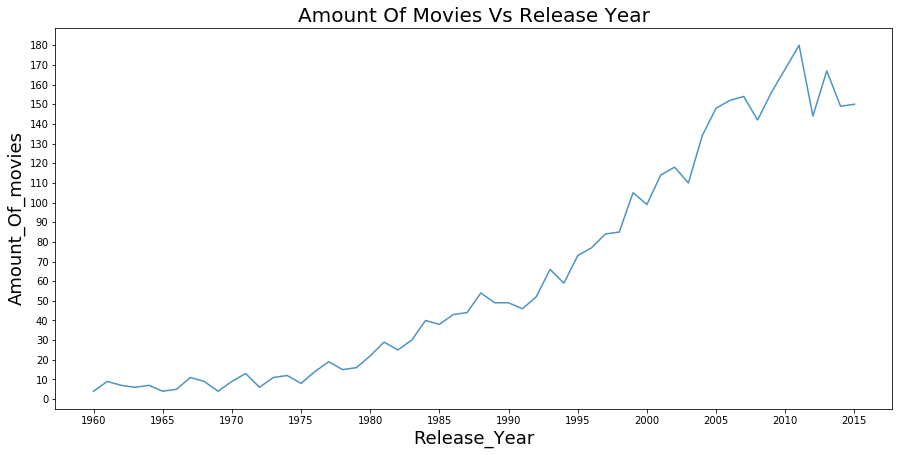

In [801]:
df.groupby('release_year')['id'].count().plot(kind='line',alpha=.8,figsize=(15,7))
#fon x axis
plt.xlabel('Release_Year',fontsize=18)
#fon y axis
plt.ylabel('Amount_Of_movies',fontsize=18)
plt.title('Amount Of Movies Vs Release Year',fontsize=20)
plt.yticks(np.arange(0,190,10))
plt.xticks(np.arange(1960,2020,5))


> ### Research Question 2 : How Total profit have changed over the years?


In [802]:
#let's insert a new column called 'profit'.
#profit=revenue-budget

df.insert(5,'profit',df['revenue']-df['budget'])

In [803]:
#checking the inserted column profit
df.head(2)

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,tt0369610,32.99,150000000.00,1513528810.00,1363528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015
1,76341,tt1392190,28.42,150000000.00,378436354.00,228436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015


In [804]:
#for the range of xsticks,ysticks
df.groupby('release_year')['profit'].sum().describe()

count            56.00
mean     4790842824.25
std      5215530164.80
min        52468689.00
25%       618145179.50
50%      2209064361.00
75%      8140051696.50
max     18919334715.00
Name: profit, dtype: float64

([<matplotlib.axis.XTick at 0xa3e6ed54c8>,
 <a list of 12 Text xticklabel objects>)

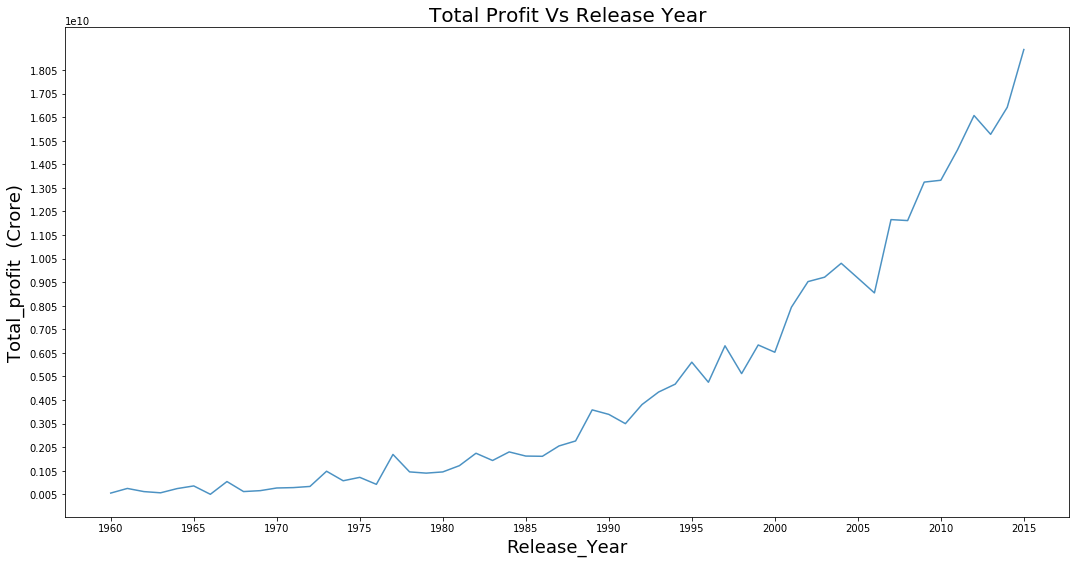

In [805]:
#plotting
df.groupby('release_year')['profit'].sum().plot(kind='line',alpha=.8,figsize=(18,9))
plt.xlabel('Release_Year',fontsize=18)
plt.ylabel('Total_profit  (Crore)',fontsize=18)
plt.title('Total Profit Vs Release Year',fontsize=20)
plt.yticks(np.arange(52468689,18919334715,1000000000))
plt.xticks(np.arange(1960,2020,5))


> ### Research Question 3 : What properties are associated with movies that have the most popularity?

In [806]:
df.popularity.describe()

count   3544.00
mean       1.25
std        1.52
min        0.01
25%        0.50
50%        0.86
75%        1.44
max       32.99
Name: popularity, dtype: float64

In [807]:
#creating a new column based on the popularity
pop_range=[0.01,0.50,0.86,1.44,32.99]
pop_level=['very_low','low','medium','high']
df['popularity_level']=pd.cut(df['popularity'],pop_range,labels=pop_level)

C:\Users\Personal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Comparision Between Profit And Budget')

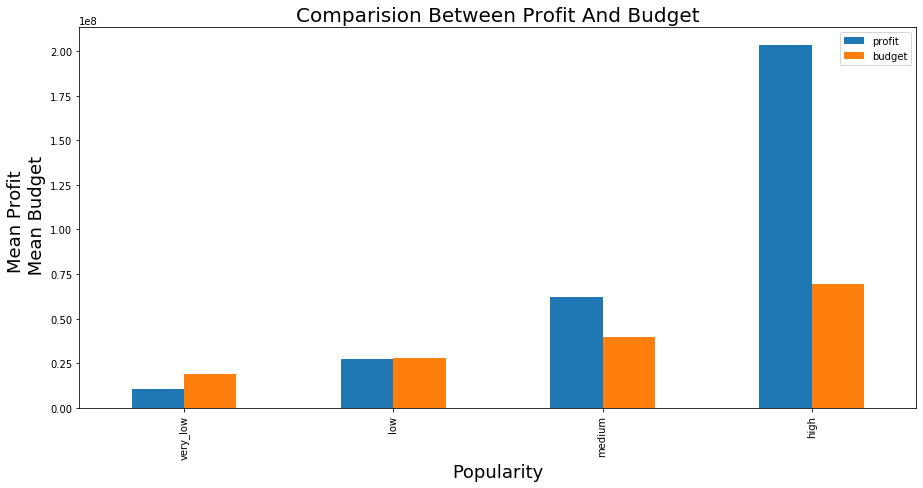

In [808]:
#plotting
df.groupby('popularity_level')['profit','budget'].mean().plot(kind='bar',figsize=(15,7))
plt.ylabel('Mean Profit \n Mean Budget',fontsize=18)
plt.xlabel('Popularity',fontsize=18)
plt.title('Comparision Between Profit And Budget',fontsize=20)


Text(0.5, 1.0, 'Vote_Average Vs Popularity')

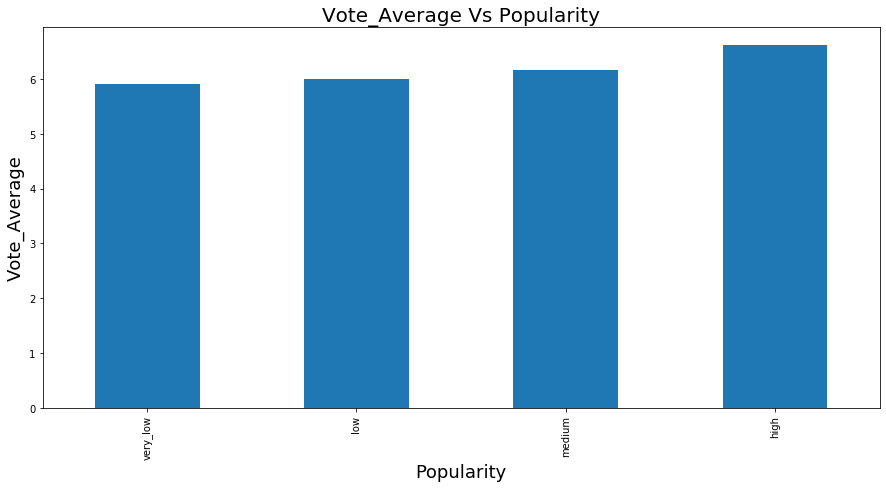

In [809]:
#plotting
df.groupby('popularity_level')['vote_average'].mean().plot(kind='bar',figsize=(15,7))
plt.ylabel('Vote_Average',fontsize=18)
plt.xlabel('Popularity',fontsize=18)
plt.title('Vote_Average Vs Popularity',fontsize=20)

Text(0.5, 1.0, 'Popularity Vs Runtime')

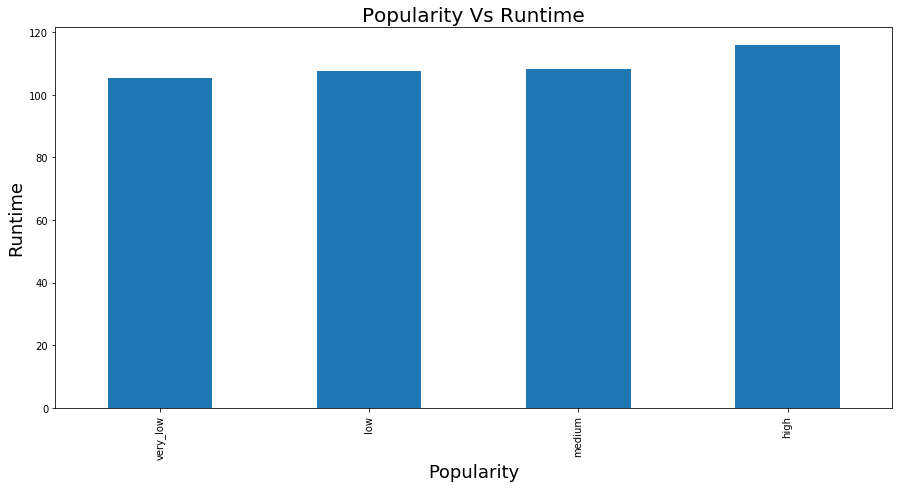

In [810]:
#plotting
df.groupby('popularity_level')['runtime'].mean().plot(kind='bar',figsize=(15,7))
plt.ylabel('Runtime',fontsize=18)
plt.xlabel('Popularity',fontsize=18)
plt.title('Popularity Vs Runtime',fontsize=20)

> ### Research Question 4 : What properties are associated with movies that have high profitability?


In [811]:
df.profit.describe()

count         3544.00
mean      75701805.35
std      155060492.01
min     -413912431.00
25%        -453814.25
50%       23720477.00
75%       90509863.25
max     2544505847.00
Name: profit, dtype: float64

In [812]:
#create new column based on profitability
pro_range=[-413912431,-453814.25,23720477,90509863.25,2544505847]
pro_level=['very_low','low','medium','high']
df['profit_level']=pd.cut(df['profit'],pro_range,labels=pro_level)

In [813]:
#checking
df.head()

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year,popularity_level,profit_level
0,135397,tt0369610,32.99,150000000.00,1513528810.00,1363528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,high,high
1,76341,tt1392190,28.42,150000000.00,378436354.00,228436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,high,high
2,262500,tt2908446,13.11,110000000.00,295238201.00,185238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,high,high
3,140607,tt2488496,11.17,200000000.00,2068178225.00,1868178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,high,high
4,168259,tt2820852,9.34,190000000.00,1506249360.00,1316249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,high,high


Text(0.5, 1.0, 'Profitability Vs Vote_Average')

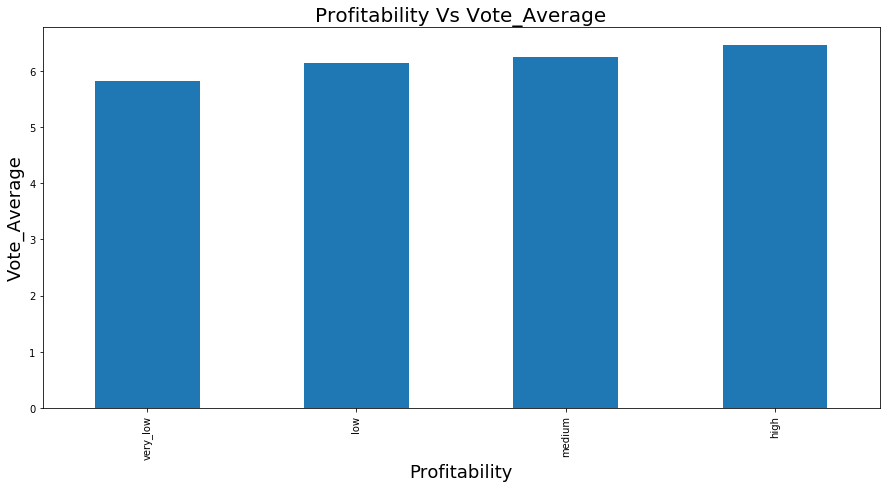

In [814]:
#plotting
df.groupby('profit_level')['vote_average'].mean().plot(kind='bar',figsize=(15,7))
plt.ylabel('Vote_Average',fontsize=18)
plt.xlabel('Profitability',fontsize=18)
plt.title('Profitability Vs Vote_Average',fontsize=20)

Text(0.5, 1.0, 'Profitability Vs Runtime')

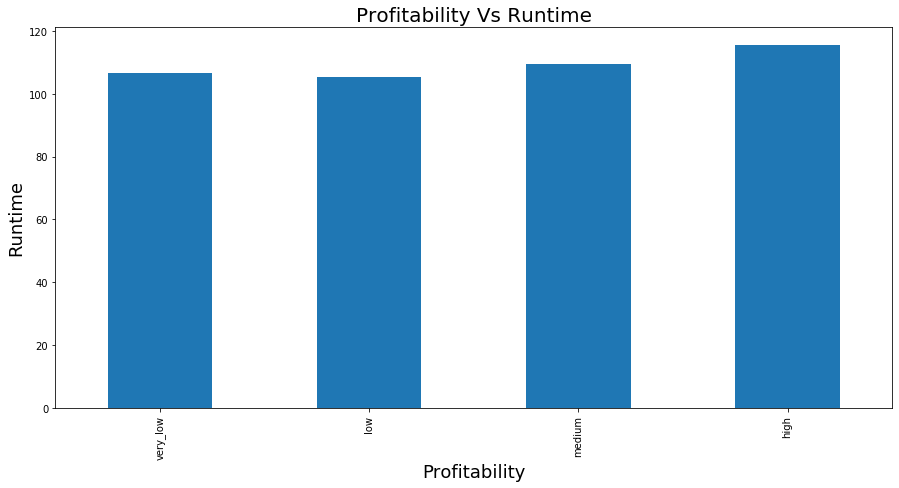

In [815]:
#plotting
df.groupby('profit_level')['runtime'].mean().plot(kind='bar',figsize=(15,7))
plt.ylabel('Runtime',fontsize=18)
plt.xlabel('Profitability',fontsize=18)
plt.title('Profitability Vs Runtime',fontsize=20)

> ### Research Question 5 : Which genres are more profitable?
 

In [816]:
#create a new dataframe having high profit level
df1=df.query('profit_level =="high"')

In [817]:
#checking
df1

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year,popularity_level,profit_level
0,135397,tt0369610,32.99,150000000.00,1513528810.00,1363528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,high,high
1,76341,tt1392190,28.42,150000000.00,378436354.00,228436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,high,high
2,262500,tt2908446,13.11,110000000.00,295238201.00,185238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,high,high
3,140607,tt2488496,11.17,200000000.00,2068178225.00,1868178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,high,high
4,168259,tt2820852,9.34,190000000.00,1506249360.00,1316249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,642,tt0064115,1.36,6000000.00,102308889.00,96308889.00,Butch Cassidy and the Sundance Kid,Paul Newman|Robert Redford|Katharine Ross|Stro...,George Roy Hill,"Not that it matters, but most of it is true.",110.00,History|Drama|Western|Crime,Twentieth Century Fox Film Corporation|Campani...,379,7.00,1969,medium,high
10755,621,tt0077631,1.70,6000000.00,181813770.00,175813770.00,Grease,John Travolta|Olivia Newton-John|Stockard Chan...,Randal Kleiser,Grease is the word,110.00,Music,Paramount Pictures|Robert Stigwood Organizatio...,786,7.00,1978,high,high
10756,579,tt0077766,1.56,20000000.00,187884007.00,167884007.00,Jaws 2,Roy Scheider|Lorraine Gary|Murray Hamilton|Jos...,Jeannot Szwarc,Just when you thought it was safe to go back i...,116.00,Horror|Thriller,Universal Pictures,179,5.50,1978,high,high
10758,1924,tt0078346,1.21,55000000.00,300218018.00,245218018.00,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,Richard Donner,You'll Believe a Man Can Fly!,143.00,Adventure|Fantasy|Action|Science Fiction,Warner Bros.|Dovemead Films|Film Export A.G.,518,6.70,1978,medium,high


In [818]:
#counting profitable genres
pro_g = df1['genres'].str.cat(sep = '|')
pro_g = pd.Series(pro_g.split('|'))
pro_count = pro_g.value_counts(ascending = False)

In [819]:
pro_count

Action             332
Comedy             324
Adventure          287
Drama              286
Thriller           254
Family             169
Science Fiction    154
Fantasy            149
Romance            137
Crime              118
Animation          101
Mystery             75
Horror              69
Music               33
War                 30
History             18
Western             12
Documentary          2
dtype: int64

Text(0, 0.5, 'Genres')

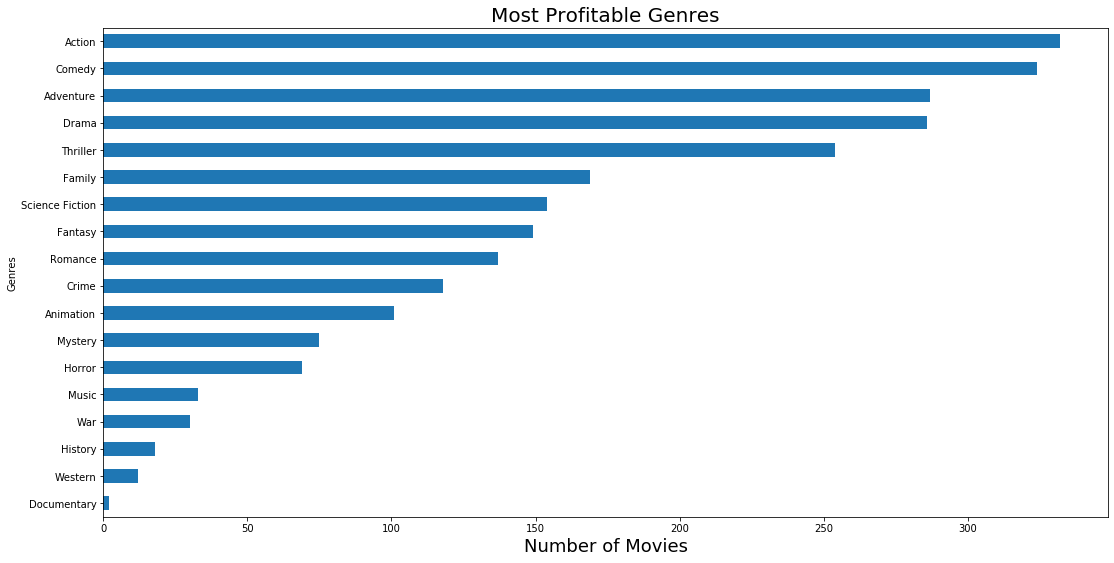

In [820]:
#plotting
pro_count.sort_values(ascending = True).plot(kind='barh',figsize=(18,9))
plt.title('Most Profitable Genres',fontsize=20)                                         
plt.xlabel('Number of Movies',fontsize=18)
plt.ylabel('Genres')


> ### Research Question 6 : Who are the most frequent cast in highly profitable movies?

In [821]:
#counting frequent cast in high profitable movies
pro_c = df1['cast'].str.cat(sep = '|')
pro_c = pd.Series(pro_c.split('|'))
pro_count = pro_c.value_counts(ascending = False)

In [822]:
pro_count=pro_count.head(10)

In [823]:
pro_count

Tom Cruise            25
Tom Hanks             19
Brad Pitt             19
Adam Sandler          17
Cameron Diaz          17
Sylvester Stallone    16
Will Smith            16
Ben Stiller           15
Bruce Willis          15
Jim Carrey            15
dtype: int64

Text(0, 0.5, 'Cast')

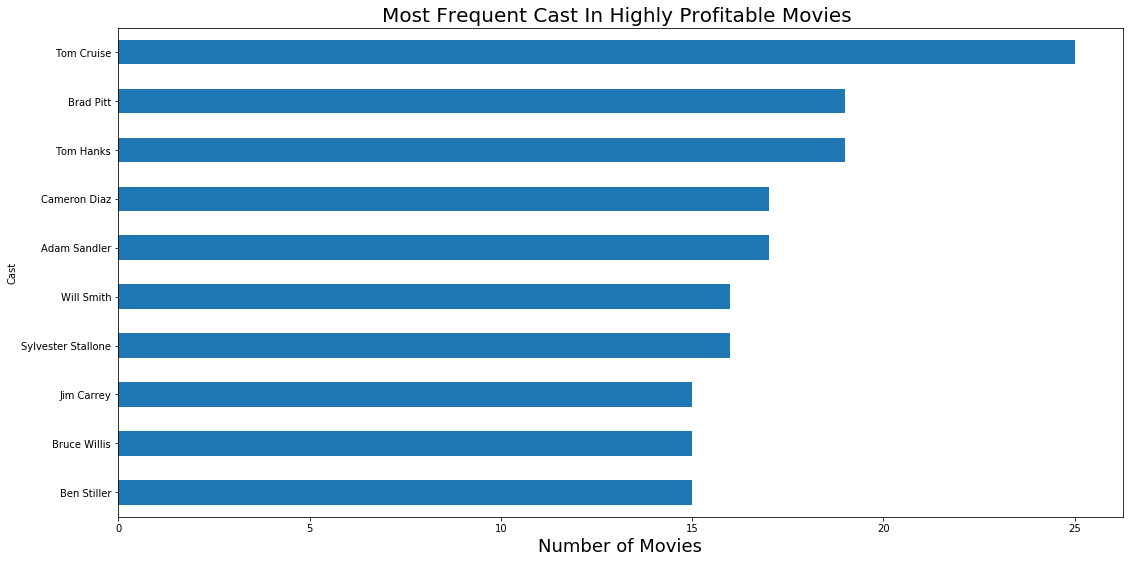

In [834]:
#plotting
pro_count.sort_values(ascending = True).plot(kind='barh',figsize=(18,9))
plt.title('Most Frequent Cast In Highly Profitable Movies ',fontsize=20)                                         
plt.xlabel('Number of Movies',fontsize=18)
plt.ylabel('Cast')

> ### Research Question 7 : Which genres are most popular?


In [825]:
#createing new dataframe with high popularity level
df2=df.query('popularity_level =="high"')

In [826]:
df2

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,vote_count,vote_average,release_year,popularity_level,profit_level
0,135397,tt0369610,32.99,150000000.00,1513528810.00,1363528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,high,high
1,76341,tt1392190,28.42,150000000.00,378436354.00,228436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,high,high
2,262500,tt2908446,13.11,110000000.00,295238201.00,185238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,high,high
3,140607,tt2488496,11.17,200000000.00,2068178225.00,1868178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,high,high
4,168259,tt2820852,9.34,190000000.00,1506249360.00,1316249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,10112,tt0065421,1.94,4000000.00,55675257.00,51675257.00,The Aristocats,Phil Harris|Sterling Holloway|Scatman Crothers...,Wolfgang Reitherman,A tune-filled animated extravaganza.,78.00,Animation|Comedy|Family|Adventure,Walt Disney Productions,625,7.00,1970,high,medium
10689,660,tt0059800,1.91,11000000.00,141195658.00,130195658.00,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,Look up! Look down! Look out!,130.00,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),331,6.30,1965,high,high
10724,668,tt0064757,1.78,7000000.00,81974493.00,74974493.00,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,142.00,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,258,6.40,1969,high,medium
10755,621,tt0077631,1.70,6000000.00,181813770.00,175813770.00,Grease,John Travolta|Olivia Newton-John|Stockard Chan...,Randal Kleiser,Grease is the word,110.00,Music,Paramount Pictures|Robert Stigwood Organizatio...,786,7.00,1978,high,high


In [827]:
#counting
pop_g = df2['genres'].str.cat(sep = '|')
pop_g = pd.Series(pop_g.split('|'))
pop_count = pop_g.value_counts(ascending = False)

In [828]:
pop_count

Action             355
Adventure          305
Drama              298
Thriller           283
Comedy             269
Science Fiction    186
Fantasy            166
Family             154
Romance            129
Crime              129
Animation           96
Mystery             67
Horror              57
War                 34
Music               24
History             21
Western              8
dtype: int64

Text(0, 0.5, 'Genres')

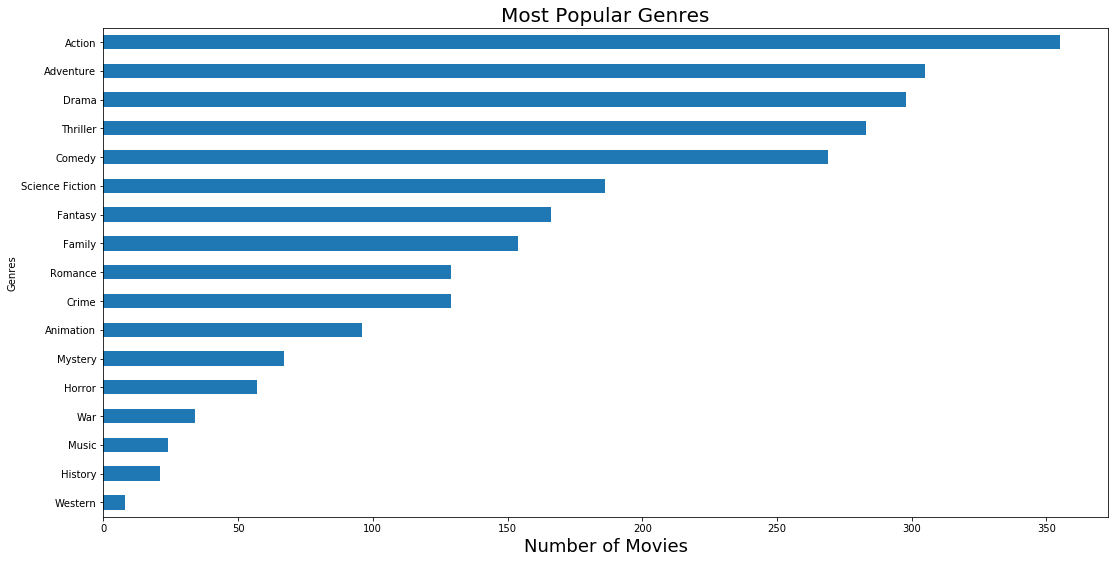

In [829]:
pop_count.sort_values(ascending = True).plot(kind='barh',figsize=(18,9))
plt.title('Most Popular Genres',fontsize=20)                                         
plt.xlabel('Number of Movies',fontsize=18)
plt.ylabel('Genres')

> ### Research Question 8 : Who are the most frequent cast in the most popular movies?

In [830]:
pop_c = df2['cast'].str.cat(sep = '|')
pop_c = pd.Series(pop_c.split('|'))
pop_count = ddata.value_counts(ascending = False)

In [835]:
#taking top 10 results
pop_count=pop_count.head(10)

In [836]:
pop_count

Robert De Niro       18
Tom Cruise           17
Jason Statham        16
Brad Pitt            16
Tom Hanks            16
Johnny Depp          16
Bruce Willis         16
Liam Neeson          15
Leonardo DiCaprio    14
Harrison Ford        14
dtype: int64

Text(0, 0.5, 'Cast')

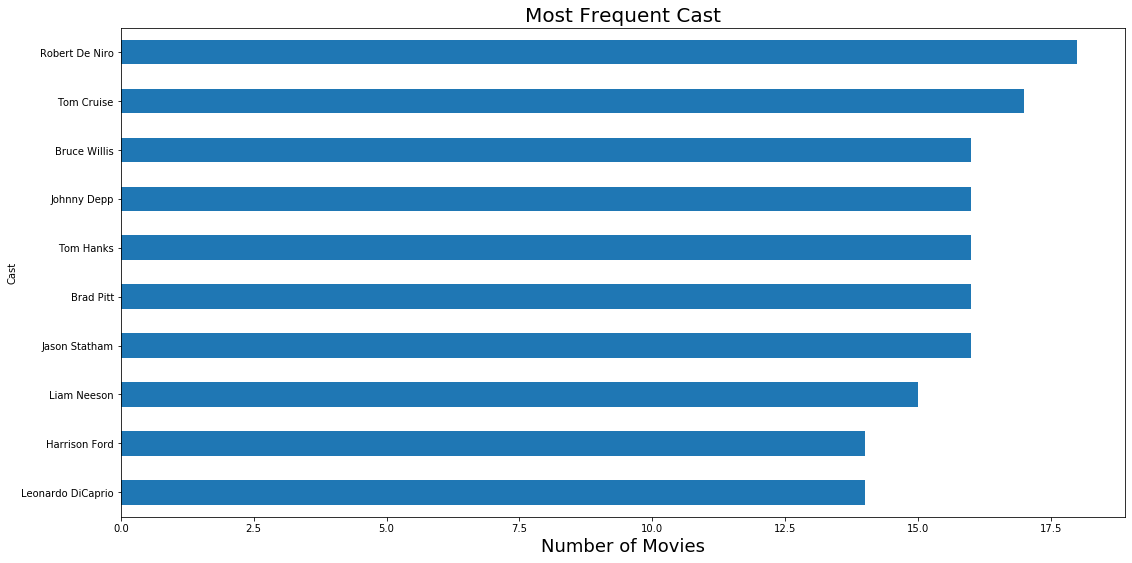

In [832]:
pop_count.sort_values(ascending = True).plot(kind='barh',figsize=(18,9))
plt.title('Most Frequent Cast',fontsize=20)                                         
plt.xlabel('Number of Movies',fontsize=18)
plt.ylabel('Cast')

<a id='conclusions'></a>
## Conclusions

> * From the graphs it is quite clear that the film production have benn increasing over the years.
> * Total amount of profit have benn increasing over the years.
> * The movies with large budget got higher profit.
> * Most popular movies have a large budget.
> * Most popular movies earned higher profit.
> * Most popular genres are Action,Adventure,Drama,Thriller,Comedy.  
> * In most popular movies most frequent cast are Robert De Niro,Tom Cruise,Jason Statham,Brad Pitt,Tom Hanks,Johnny Depp,          Bruce Willis
> * Most profitable movies have a large budget.
> * Most profitable movies earned higher profit.
> * Most profitable Genres are Action,Comedy,Adventure,Drama,Thriller
> * In most popular movies most frequent cast are Tom Cruise,Tom Hanks,Brad Pitt,Adam Sandler,Cameron Diaz,Sylvester,              Stallone,Will Smith 


### An Interesting Fact
>  * Vote_average have a small impact on popularity and profitability


#### limitation: 
    * The results are not error free.Missing data can affect the result.The conclutions are based on the dataset

In [833]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0